In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import json

In [2]:
input_file = '/home/kimino/soft/qcm-detector/results_3.json'
with open(input_file, 'r') as file:
    json_data = json.loads(file.read())

/home/kimino/soft/qcm-detector/env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


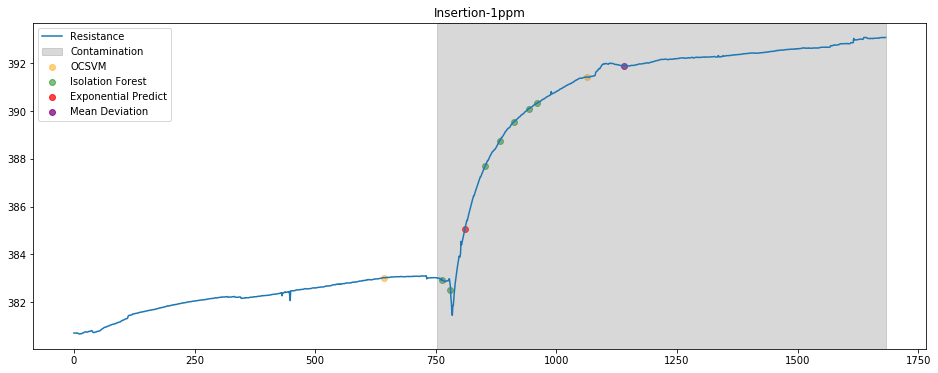

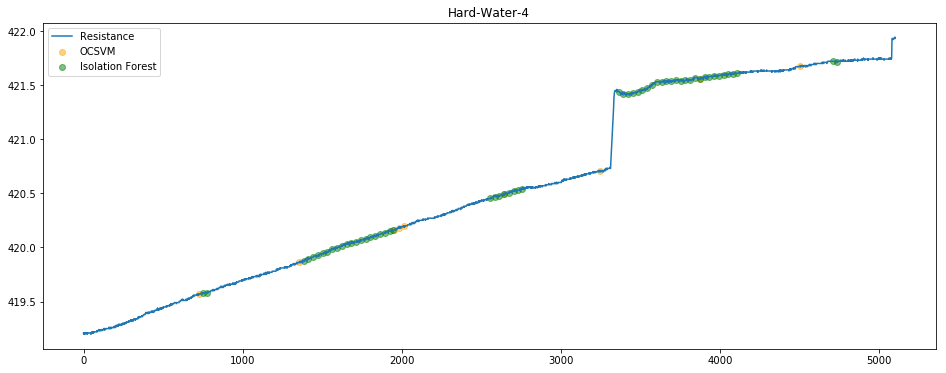

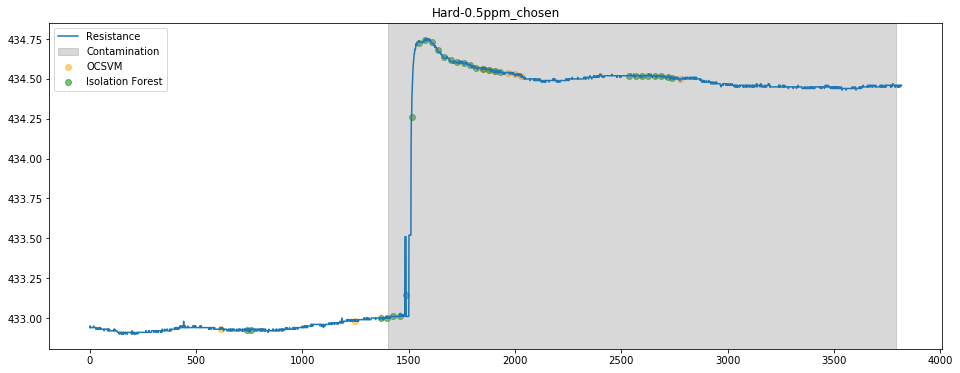

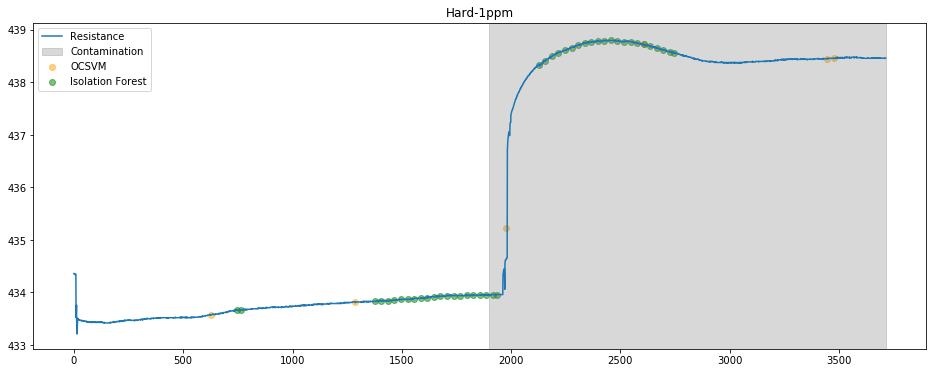

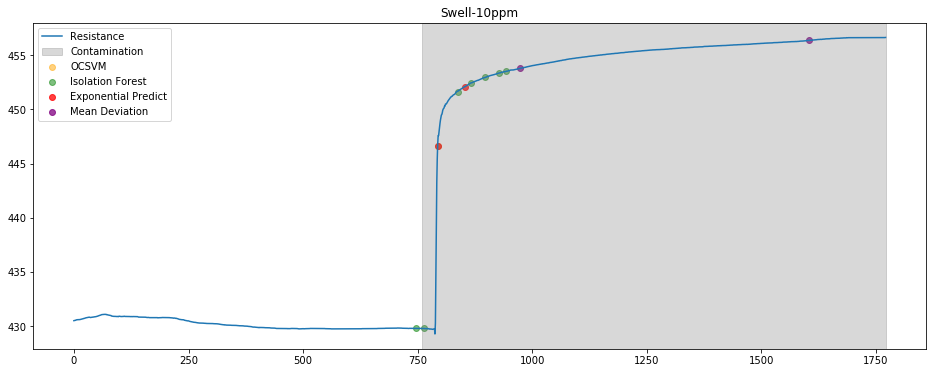

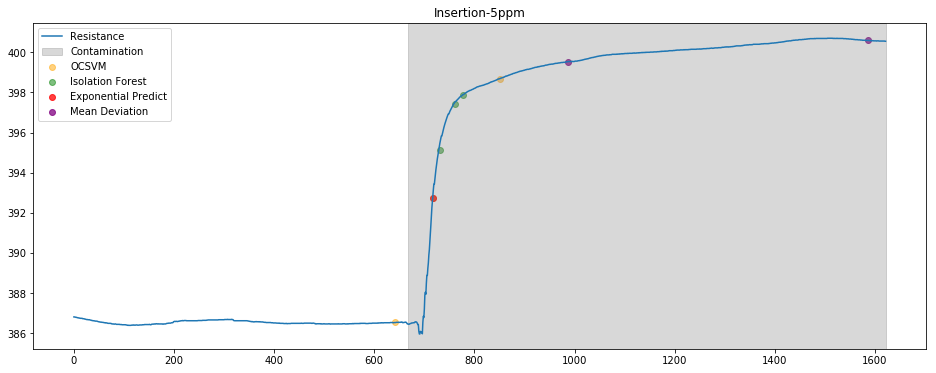

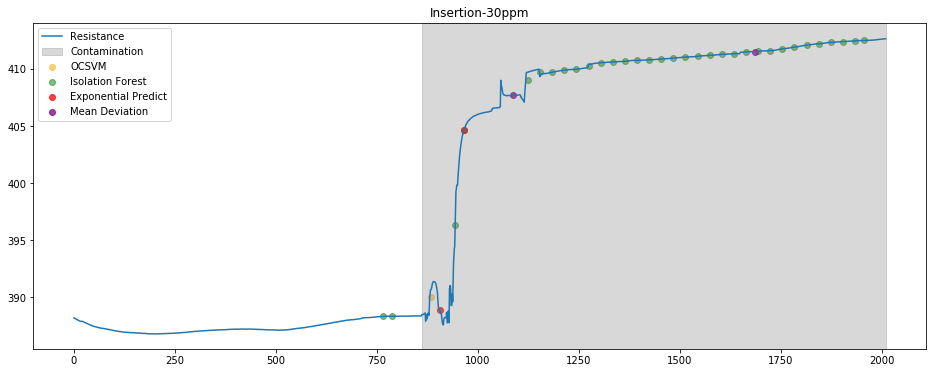

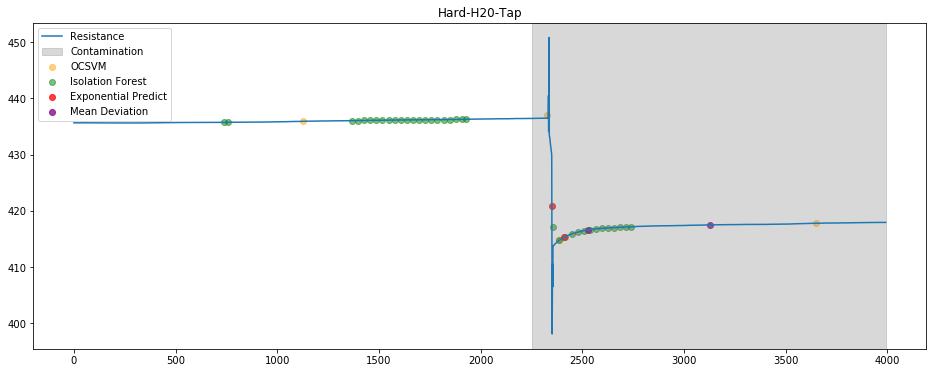

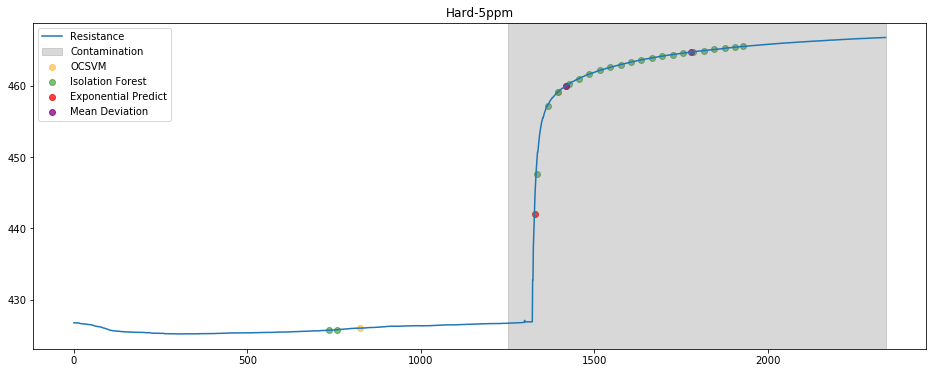

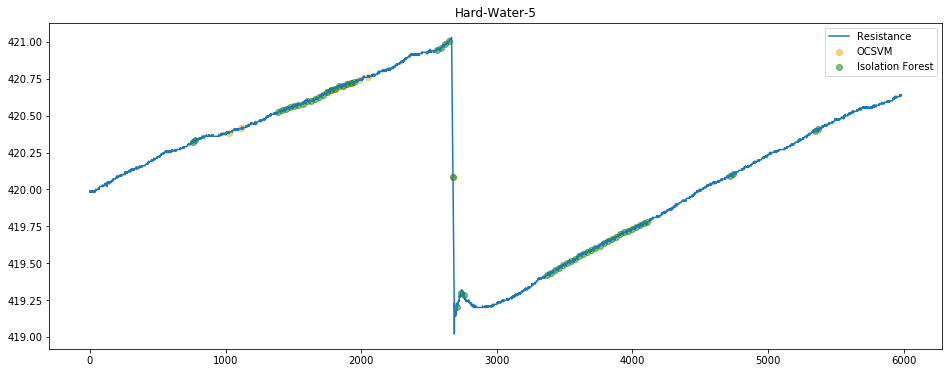

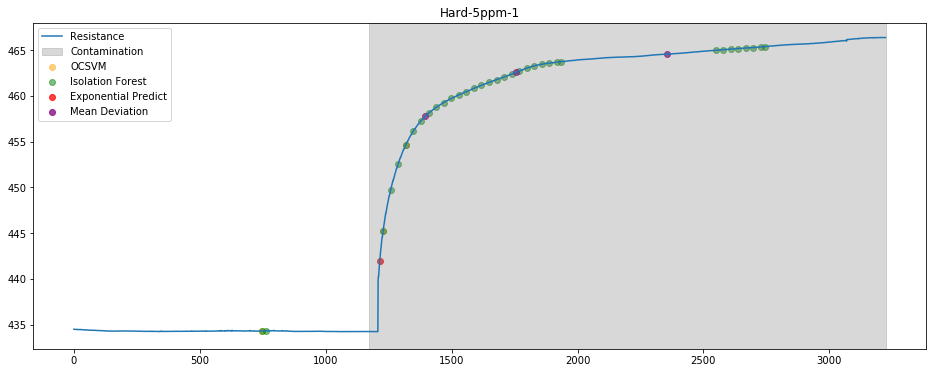

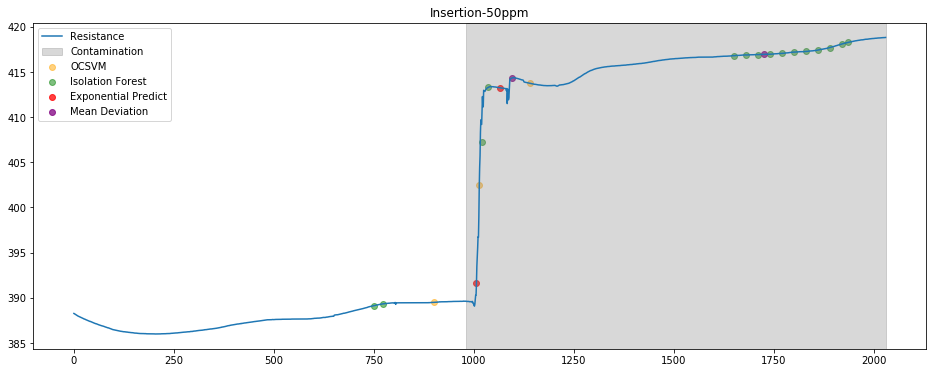

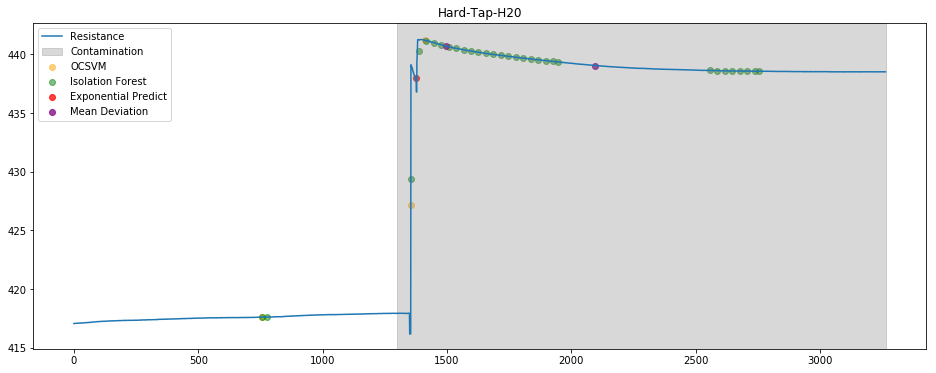

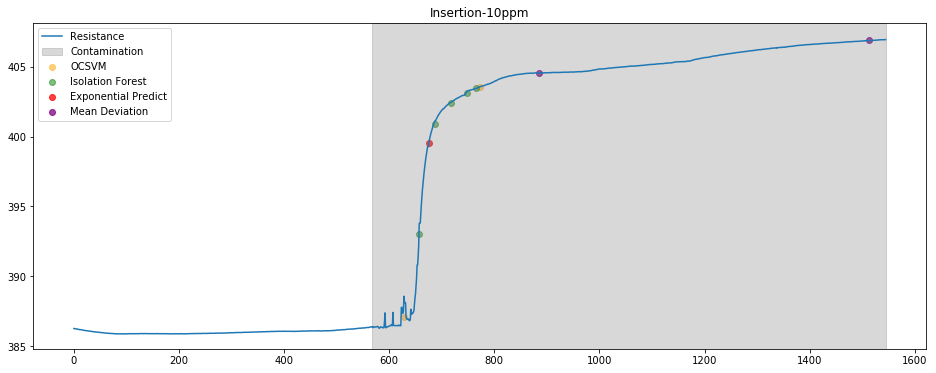

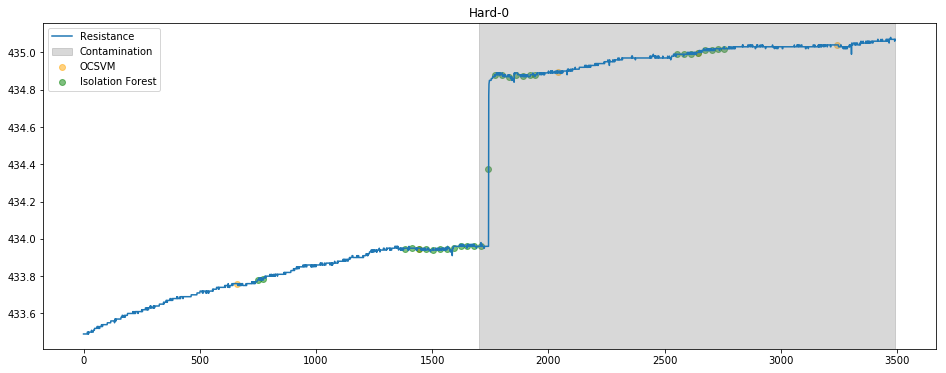

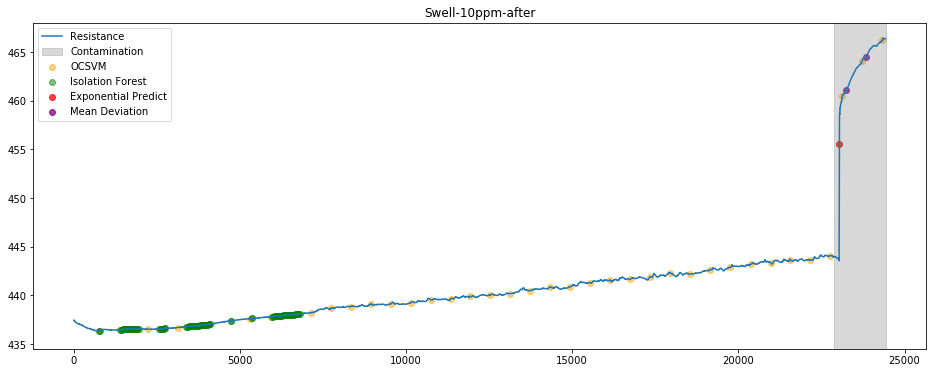

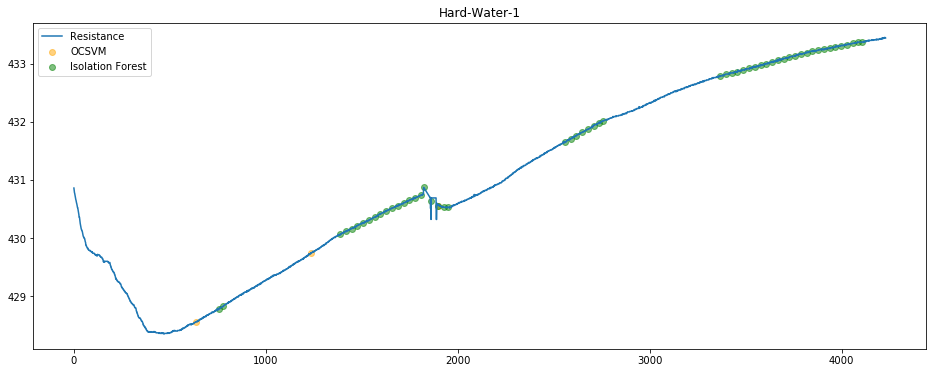

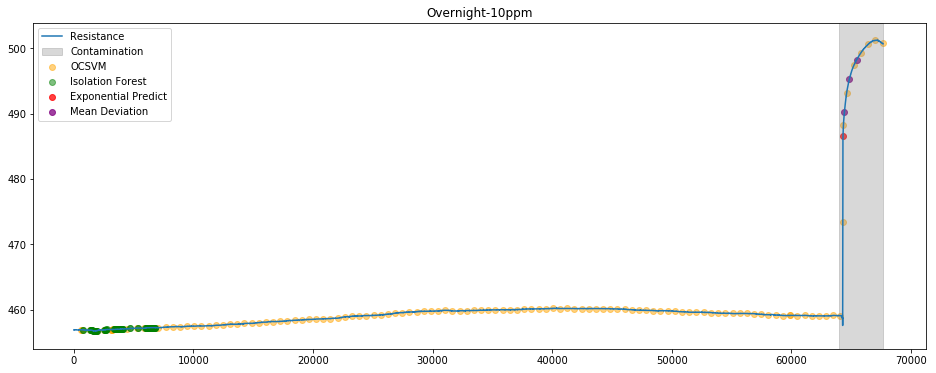

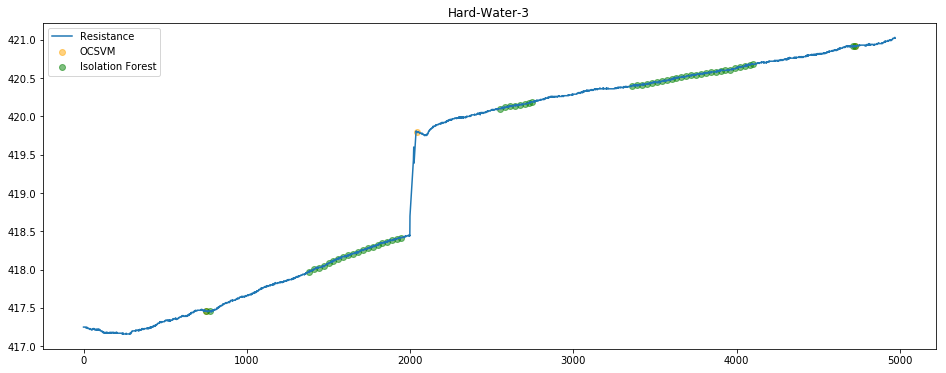

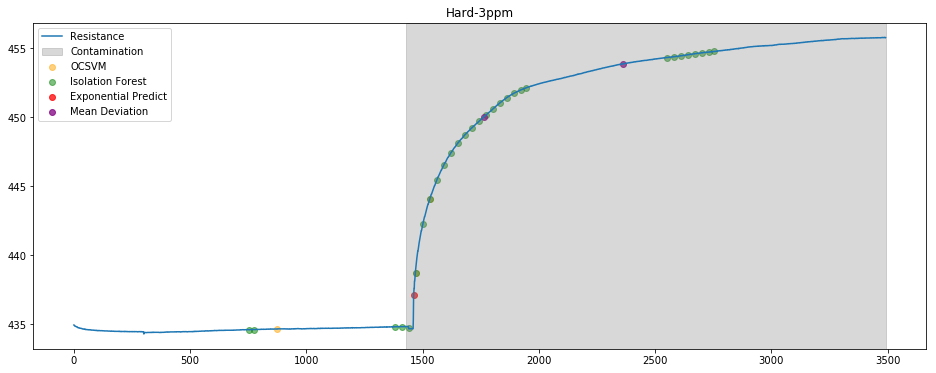

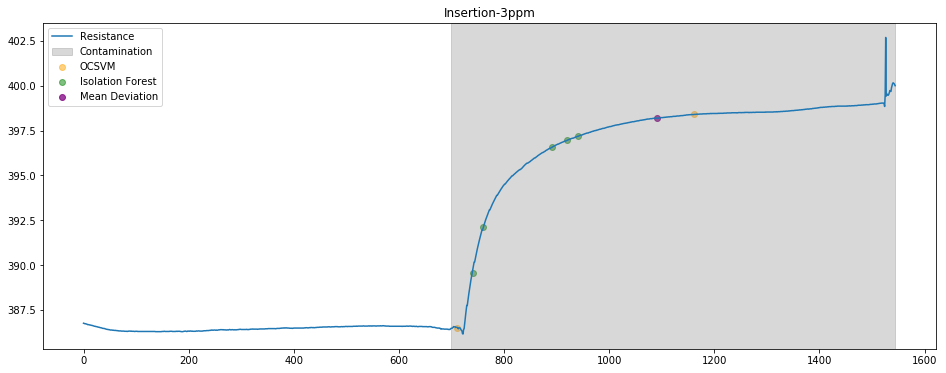

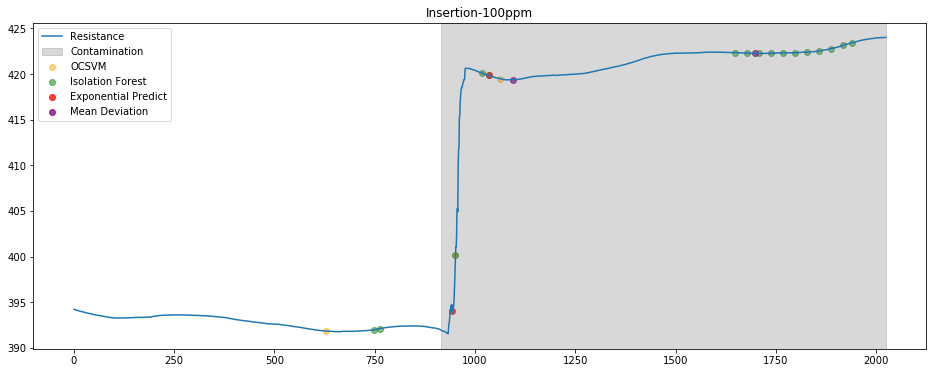

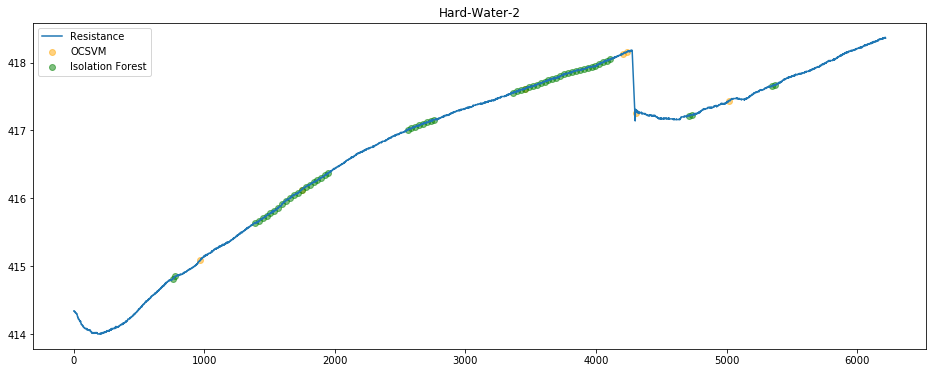

In [5]:
for experiment in json_data:
    data_df = pd.read_csv(json_data[experiment]['Path'], parse_dates=['Time'], dayfirst=True)
    data_df['timestamp'] = data_df['Time'].values.astype(int)/10**9 + 10800
    initial_ts = data_df['timestamp'].values[0]
    data_df.index = data_df['timestamp'] - initial_ts
    fig, ax = subplots(figsize=(16, 6))
    ax.plot(data_df['Resistance'])
    # roll_std = data_df['Resistance'].rolling(window = 5).std()
    # ax.fill_between(x = data_df.index, y1 = data_df['Resistance'] - roll_std*3,y2 = data_df['Resistance'] + roll_std*3, alpha = 0.3, color = 'gray')
    detections_df = pd.DataFrame(json_data[experiment]['Detections'])
    colors = ['red', 'purple', 'pink', 'orange']
    if not detections_df.empty:
        for detector in detections_df['detector'].unique():
            plot_data = detections_df[detections_df['detector'] == detector]
            plot_data['timestamp'] = plot_data['timestamp'] - initial_ts
            plot_data = plot_data[plot_data['timestamp'] > 300]
            if detector == 'Expo-predict':
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'red',label = 'Exponential Predict', alpha = 0.75)
            elif detector == 'Mean-shift':
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'purple',label = 'Mean Deviation', alpha = 0.75)
            elif detector == 'IsolationForest':
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'green',label = 'Isolation Forest', alpha = 0.5)
            else:
                ax.scatter(x = plot_data['timestamp'], y = plot_data['resistance'], c = 'orange',label = 'OCSVM', alpha = 0.5)
    if len(json_data[experiment]['Anomalies'])> 0:
        anomaly = json_data[experiment]['Anomalies'][0]
        start = anomaly['Start'] - initial_ts
        end = anomaly['End'] - initial_ts
        ax.axvspan(start, end, alpha= 0.3, color = 'gray', label = 'Contamination')
    plt.title(f"{experiment}")
    plt.legend(loc = 'best')
    plt.savefig(f"{experiment}.png")
    plt.show()

In [4]:
'aksldfmlkdasASDMKLDSMALKD'.lower()

'aksldfmlkdasasdmkldsmalkd'

In [ ]:
pd.DataFrame(json_data).T.drop(columns=['Detections', 'Anomalies', 'True Positives', 'False Negatives'])

,Number of detections,Number of True Positives,Number of False Positives,Number of False Negatives,Number of True Negatives,Total Detection Time,Recall,Path
Insertion-1ppm,19,10,9,0,1,34.142,1,/home/kimino/soft/qcm-detector/data/tests/Inse...
Hard-Water-4,75,0,75,0,0,128.072,0,/home/kimino/soft/qcm-detector/data/tests/Hard...
Hard-0.5ppm_chosen,47,23,24,0,1,86.3211,1,/home/kimino/soft/qcm-detector/data/tests/Hard...
Hard-1ppm,57,28,29,0,1,87.5367,1,/home/kimino/soft/qcm-detector/data/tests/Hard...
Swell-10ppm,20,11,9,0,1,38.2197,1,/home/kimino/soft/qcm-detector/data/tests/Swel...
Insertion-5ppm,17,8,9,0,1,33.9402,1,/home/kimino/soft/qcm-detector/data/tests/Inse...
Insertion-30ppm,47,37,10,0,1,42.6643,1,/home/kimino/soft/qcm-detector/data/tests/Inse...
Hard-H20-Tap,52,21,31,0,1,89.9243,1,/home/kimino/soft/qcm-detector/data/tests/Hard...
Hard-5ppm,38,27,11,0,1,48.1948,1,/home/kimino/soft/qcm-detector/data/tests/Hard...
Hard-Water-5,79,0,79,0,0,138.428,0,/home/kimino/soft/qcm-detector/data/tests/Hard...


In [8]:
detections_df

,timestamp,frequency,resistance,period,time,severity,detector,notified
0,1.611855e+09,5.009925e+06,414.320476,"[0, 0]",,severe,OneClassSVM,False
1,1.611855e+09,5.009926e+06,414.275000,"[0, 0]",,severe,OneClassSVM,False
2,1.611855e+09,5.009925e+06,414.320476,"[0, 0]",,severe,IsolationForest,False
3,1.611855e+09,5.009926e+06,414.229333,"[0, 0]",,severe,IsolationForest,False
4,1.611855e+09,5.009927e+06,414.127333,"[0, 0]",,severe,IsolationForest,False
...,...,...,...,...,...,...,...,...
70,1.611860e+09,5.009928e+06,417.219667,"[0, 0]",,severe,IsolationForest,False
71,1.611860e+09,5.009928e+06,417.230714,"[0, 0]",,severe,IsolationForest,False
72,1.611860e+09,5.009926e+06,417.431667,"[0, 0]",,severe,OneClassSVM,False
73,1.611860e+09,5.009926e+06,417.654333,"[0, 0]",,severe,IsolationForest,False


In [10]:
data_df['timestamp'].describe()

count    6.200000e+03
mean     1.611858e+09
std      1.797232e+03
min      1.611855e+09
25%      1.611857e+09
50%      1.611858e+09
75%      1.611860e+09
max      1.611861e+09
Name: timestamp, dtype: float64

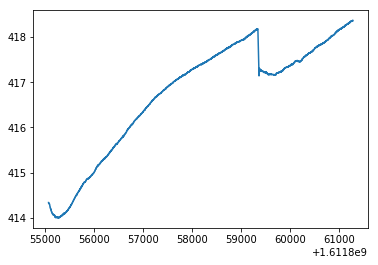

In [11]:
data_df.index = data_df['timestamp']
plt.plot(data_df['Resistance'])

In [68]:
df = pd.read_csv('/home/kimino/soft/qcm-detector/data/tests/Overnight-10ppm_chosen.csv', dayfirst = True, index_col='Time')

[]

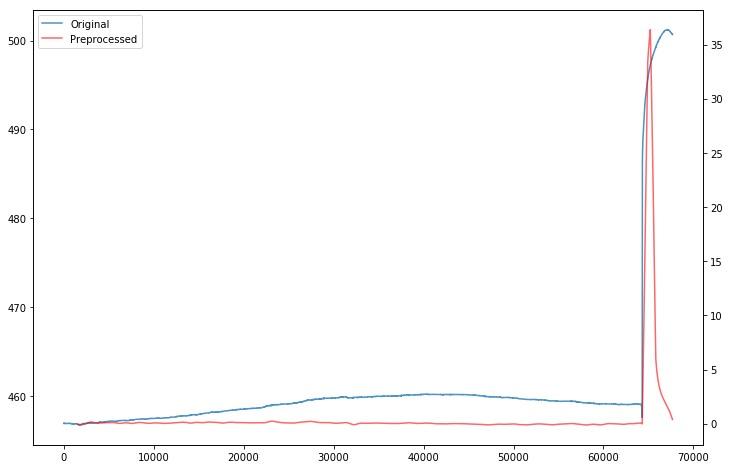

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
tax = ax.twinx()
line1 = ax.plot(df['Resistance'].values, alpha = 0.8, label = 'Original')
roll = df.rolling(window = 600).mean()
diff = roll - roll.shift(900)
line2 = tax.plot(diff['Resistance'].values, color = 'red', alpha = 0.6, label = 'Preprocessed')
line3 = ax.plot(np.nan, color = 'red', alpha = 0.6, label = 'Preprocessed')
ax.legend(loc = 'best')
plt.savefig('preprocesse.png')
plt.plot()